**Task A**

**Question A**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CW2_Dataset/BrentOilPrices.csv')

In [ ]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='mixed', errors='coerce')

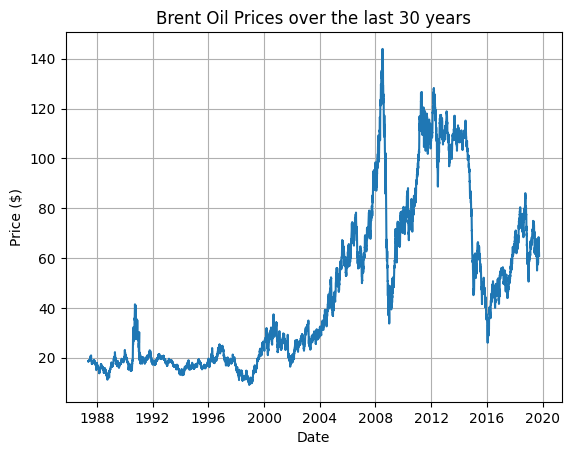

In [ ]:
# Plot Brent oil prices
plt.plot(data['Date'], data['Price'])
plt.title('Brent Oil Prices over the last 30 years')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.show()

**Question B**

In [ ]:
data['MA3'] = data['Price'].shift(1).rolling(window=3).mean()
data['MA9']= data['Price'].shift(1).rolling(window=9).mean()

In [ ]:
data

,Date,Price,MA3,MA9
0,1987-05-20,18.63,NaN,NaN
1,1987-05-21,18.45,NaN,NaN
2,1987-05-22,18.55,NaN,NaN
3,1987-05-25,18.60,18.543333,NaN
4,1987-05-26,18.63,18.533333,NaN
...,...,...,...,...
8211,2019-09-24,64.13,64.713333,64.163333
8212,2019-09-25,62.41,64.673333,64.286667
8213,2019-09-26,62.08,63.733333,64.470000
8214,2019-09-27,62.48,62.873333,64.562222


**Question C**

In [ ]:
# Initialising X and assigning the two feature variables
X = data[['MA3','MA9']]

In [ ]:
# Setting-up the dependent variable
Y = data['Price']

In [ ]:
X,Y

(            MA3        MA9
 0           NaN        NaN
 1           NaN        NaN
 2           NaN        NaN
 3     18.543333        NaN
 4     18.533333        NaN
 ...         ...        ...
 8211  64.713333  64.163333
 8212  64.673333  64.286667
 8213  63.733333  64.470000
 8214  62.873333  64.562222
 8215  62.323333  63.902222
 
 [8216 rows x 2 columns],
 0       18.63
 1       18.45
 2       18.55
 3       18.60
 4       18.63
         ...  
 8211    64.13
 8212    62.41
 8213    62.08
 8214    62.48
 8215    60.99
 Name: Price, Length: 8216, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Define Train and Test Data
X = data[['MA3', 'MA9']]
y = data['Price']

In [ ]:
# Fill NaN values with 0 in X
X = X.fillna(0)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Reproducible Seed
np.random.seed(42)

**Question D**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Build and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Question E**

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')


Mean Squared Error: 1.9136573555218528
R-squared: 0.9982049052244079


In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')


Mean Squared Error: 1.894185677511491
R-squared: 0.9982508614615273


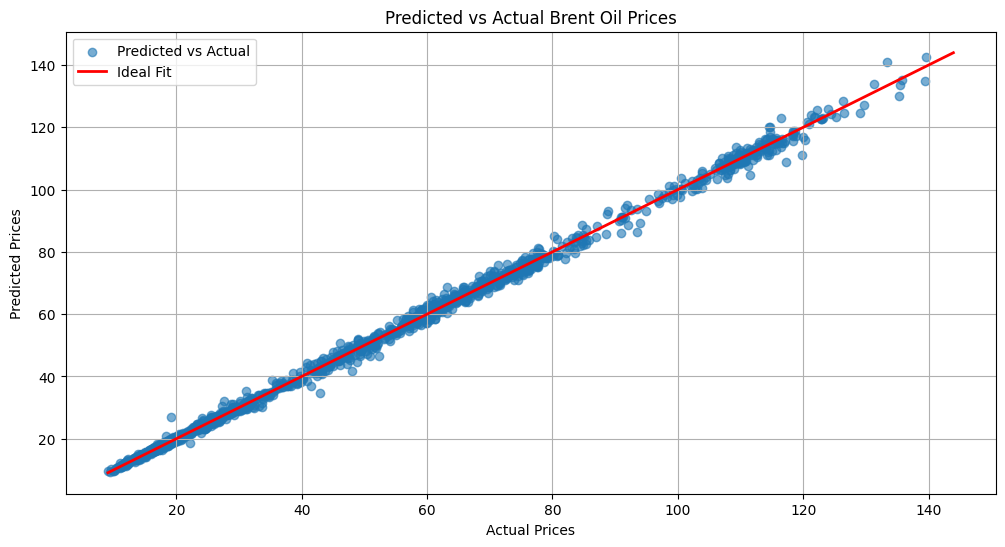

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Ideal Fit')
plt.title('Predicted vs Actual Brent Oil Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

**Question F**

In [ ]:
#Extract Alpha and Beta Values
alpha = model.intercept_
betas = model.coef_
print(f'Alpha (Intercept): {alpha}')
print(f'Betas (Coefficients): {betas}')

Alpha (Intercept): 0.07239408806389491
Betas (Coefficients): [ 1.19505257 -0.19640733]


In [ ]:
# Formulate the Linear Regression Model
def regression_equation():
    equation = f"Price = {alpha:.2f} + {betas[0]:.2f} * MA3 + {betas[1]:.2f} * MA9"
    print(f"Linear Regression Equation: {equation}")
    return equation

regression_equation()


Linear Regression Equation: Price = 0.07 + 1.20 * MA3 + -0.20 * MA9


'Price = 0.07 + 1.20 * MA3 + -0.20 * MA9'